In [1]:
import numpy as np
import xarray as xr
import glob
import os
from pcmdi_metrics.graphics import portrait_plot

/global/homes/j/jungchoi/.conda/envs/pcmdi_metrics/lib/python3.10/site-packages/esmpy/interface/loadESMF.py:94: VersionWarning: ESMF installation version 8.8.0, ESMPy version 8.8.0b0
  warnings.warn("ESMF installation version {}, ESMPy version {}".format(
ERROR 1: PROJ: proj_create_from_database: Open of /global/homes/j/jungchoi/.conda/envs/pcmdi_metrics/share/proj failed


In [2]:
mdl_list = ['CanESM5', 'CMCC-CM2-SR5', 'CNRM-ESM2-1', 'EC-Earth3', 'HadGEM3-GC31-MM', 'IPSL-CM6A-LR', 'MIROC6', 'MPI-ESM1-2-HR', 'MRI-ESM2-0', 'NorCPM1']

filename1 = "Fig2.Mean_bias.SIE_Arctic.nc"
filename2 = "Fig2.Mean_bias.SIE_Antarctic.nc"

ds1 = xr.open_dataset(filename1)
ds2 = xr.open_dataset(filename2)

var1_data = ds1["sic"].values
var2_data = ds2["sic"].values


Text(0, 31, '(ref: HadISST_ICE 1981-2010)')

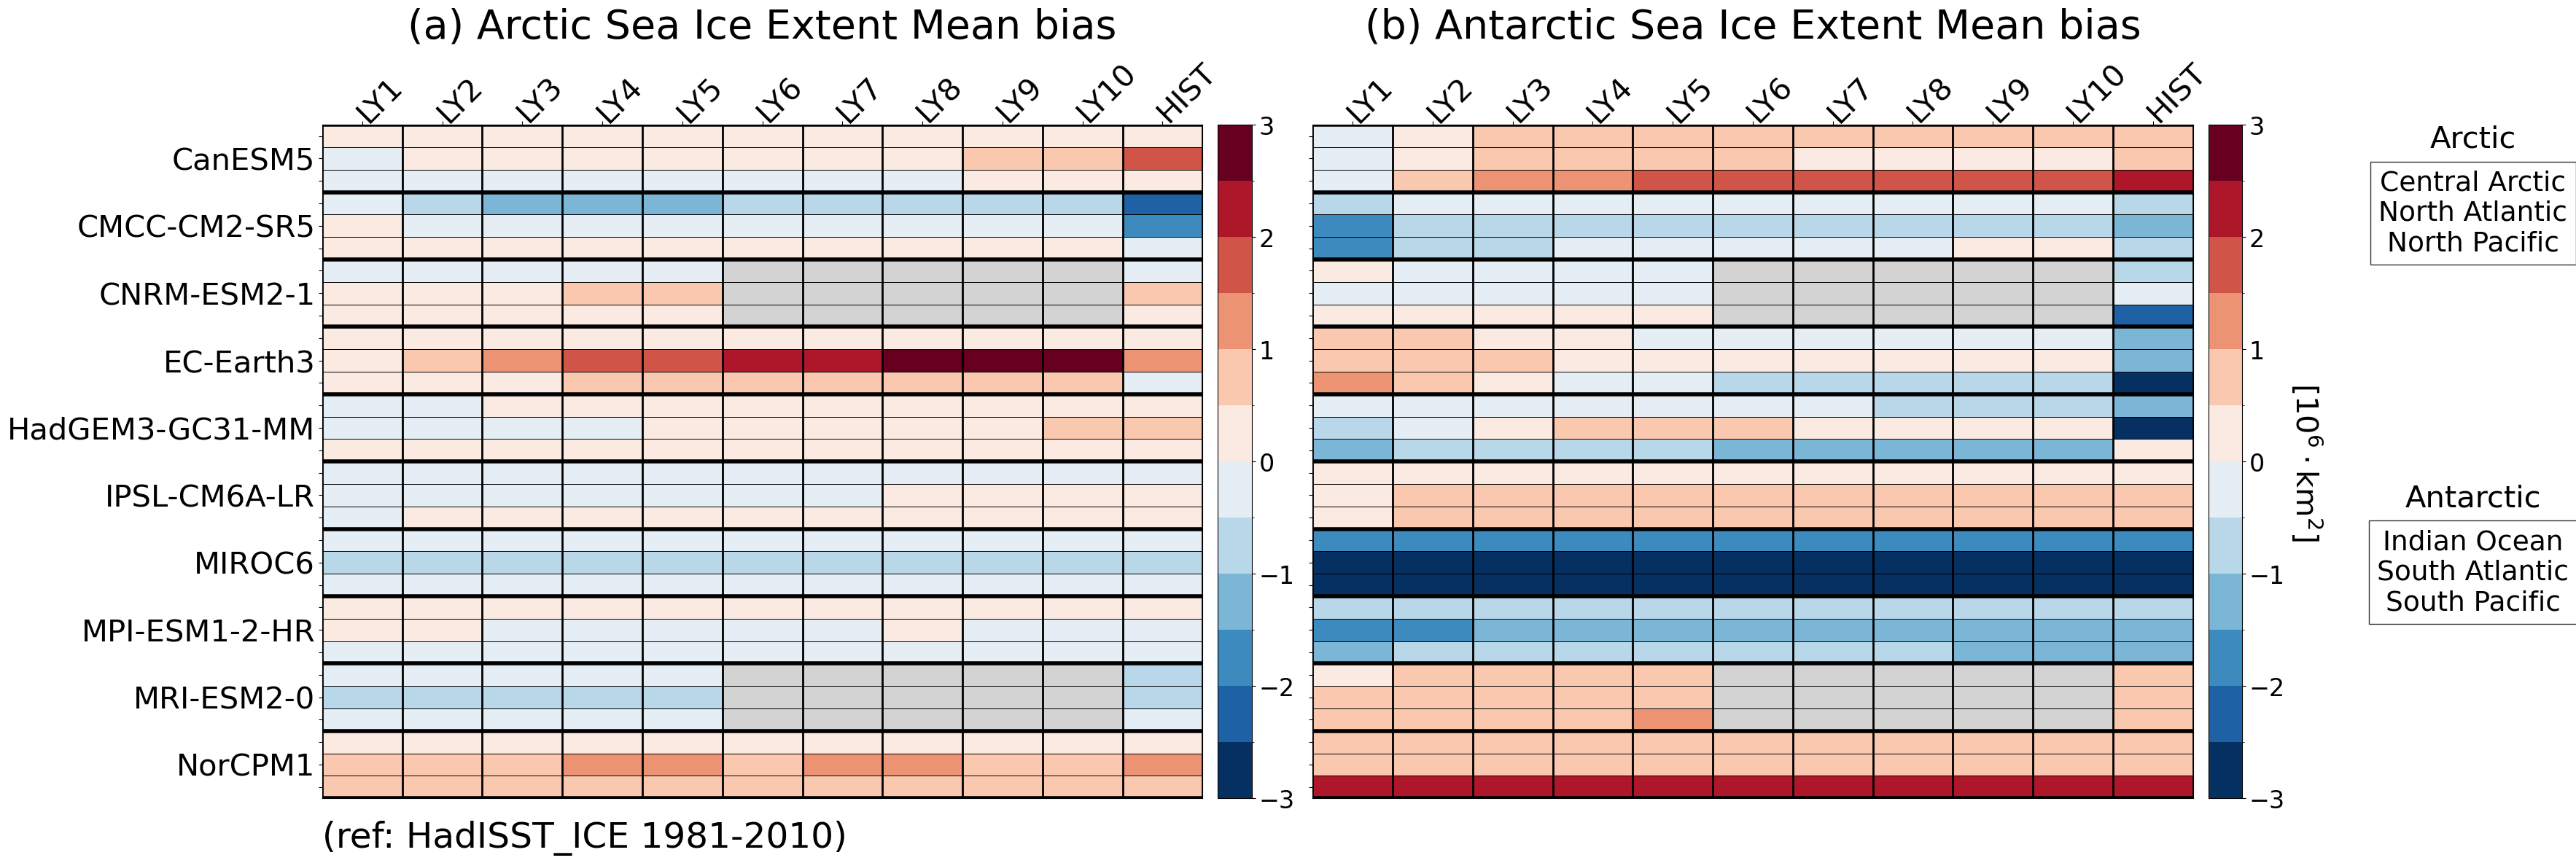

In [3]:
# Draw Portrait Plot for Mean bias (a) TAS, (b) PR
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

cmap_arctic = [-3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3]
cmap_antarctic = [-3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3]
unit = r'[10$^{6}\cdot$km$^{2}$]'
title = "Mean bias"
period = "1981-2010"

#arctic_text = f"Central Arctic\n({obs_ca:.2f})\nNorth Atlantic\n({obs_na:.2f})\nNorth Pacific\n({obs_np:.2f})"
#antarctic_text = f"Indian Ocean\n({obs_io:.2f})\nSouth Atlantic\n({obs_sa:.2f})\nSouth Pacific\n({obs_sp:.2f})"
arctic_text = f"Central Arctic\nNorth Atlantic\nNorth Pacific"
antarctic_text = f"Indian Ocean\nSouth Atlantic\nSouth Pacific"


padded_mdl_list = []

for model in mdl_list:
    padded_mdl_list.extend(['', model, ''])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(37,12))

xaxis_labels = ['LY1', 'LY2', 'LY3', 'LY4', 'LY5', 'LY6', 'LY7', 'LY8', 'LY9', 'LY10', 'HIST']
yaxis_labels = padded_mdl_list

fig, ax[0], cbar = portrait_plot([var1_data],
              fig=fig, ax=ax[0],
              xaxis_labels=xaxis_labels, xaxis_fontsize=30,
              yaxis_labels=yaxis_labels, yaxis_fontsize=30,
              #legend_on=True,
              inner_line_color="k", 
              cmap="RdBu_r",
              cmap_bounds=cmap_arctic,
              cbar_label='', cbar_label_fontsize=30, cbar_tick_fontsize=24,
              missing_color='lightgrey',
              box_as_square=False, logo_off=True)
ax[0].set_title(f"(a) Arctic Sea Ice Extent {title}", fontsize=40, pad=20)

fig, ax[1], cbar2 = portrait_plot([var2_data],
              fig=fig, ax=ax[1],
              xaxis_labels=xaxis_labels, xaxis_fontsize=30, 
              yaxis_labels=[],
              inner_line_color="k",
              cmap="RdBu_r",
              cmap_bounds=cmap_antarctic,
              cbar_label=unit, cbar_label_fontsize=30, cbar_tick_fontsize=24,
              missing_color='lightgrey',
              box_as_square=False, logo_off=True)
ax[1].set_title(f"(b) Antarctic Sea Ice Extent {title}", fontsize=40, pad=20)

plt.subplots_adjust(wspace=-0.1, hspace=0)

pos0 = ax[0].get_position()
pos1 = ax[1].get_position()
ax[0].set_position([pos0.x0, pos0.y0, pos0.width, pos0.height])
ax[1].set_position([pos1.x0, pos1.y0, pos1.width, pos1.height])

cbar.ax.set_position([pos0.x0 + 0.332, pos0.y0, 0.5, pos0.height])
cbar2.ax.set_position([pos1.x0 + 0.332, pos1.y0, 0.5, pos1.height])

for yy in range(0, 33, 3):
    ax[0].hlines(y=yy, xmin=0, xmax=11, colors='black', linestyles='-', linewidth=4, zorder=10)
    ax[1].hlines(y=yy, xmin=0, xmax=11, colors='black', linestyles='-', linewidth=4, zorder=10)
for xx in range(0, 12):
    ax[0].vlines(x=xx, ymin=0, ymax=30, colors='black', linestyles='-', linewidth=2, zorder=10)
    ax[1].vlines(x=xx, ymin=0, ymax=30, colors='black', linestyles='-', linewidth=2, zorder=10)

# legend 
ax[1].text(14.5, 2, arctic_text, fontsize=27, ha='center', va='top',
    bbox=dict(boxstyle='square', facecolor='white', edgecolor='black', alpha=0.8), zorder=10)
ax[1].text(14.5, 18, antarctic_text, fontsize=27, ha='center', va='top',
    bbox=dict(boxstyle='square', facecolor='white', edgecolor='black', alpha=0.8), zorder=10)
ax[1].text(14.5, 0, "Arctic", fontsize=30, ha='center', va='top', alpha=1)
ax[1].text(14.5, 16, "Antarctic", fontsize=30, ha='center', va='top', alpha=1)
#ax[1].text(14.5, 27, "(OBS value)", fontsize=30, ha='center', va='top', alpha=1)

ax[0].text(0, 31, f"(ref: HadISST_ICE {period})", fontsize=35, ha='left', va='top', alpha=1)

